## Extraction Time – Statistical Analysis

### Goal  
Compare extraction time between Gemini and Manual methods using paired data.

### Step 1: Visualize Distribution  
See plot below:  
Gemini shows a sharp left-skewed distribution; Manual extraction times appear approximately normal.

### Step 2: Normality Test (Shapiro-Wilk)  
- Gemini: p < 0.001 → Not normally distributed  
- Manual: p = 0.986 → Normally distributed

### Decision  
Since at least one group is not normally distributed, we used the Wilcoxon matched-pairs signed-rank test.

### Result  
- Wilcoxon test (alternative='less')  
  → p = 0.00098  
  → Statistically significant  
  → Interpretation: Gemini extraction time is significantly shorter than Manual.


Gemini extraction time: ShapiroResult(statistic=0.575659043985826, pvalue=2.8392729282612668e-05)
Manual extraction time: ShapiroResult(statistic=0.9850878028371266, pvalue=0.9865510350897377)


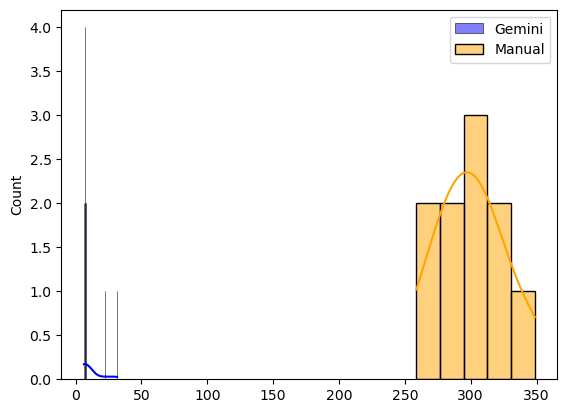

In [23]:
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

extrac_gemini = np.array([6.33, 7.42, 7.12, 7.04, 6.49, 7.18, 22.33, 7.16, 31.5, 7.26])  
extrac_manual = np.array([312.1, 348.74, 326.32, 296.42, 278.13, 258.74, 298.33, 314.87, 291.66, 276.41]) 

# Shapiro-Wilk test
print("Gemini extraction time:", shapiro(extrac_gemini))
print("Manual extraction time:", shapiro(extrac_manual))

# Optional: plot
sns.histplot(extrac_gemini, kde=True, color='blue', label='Gemini')
sns.histplot(extrac_manual, kde=True, color='orange', label='Manual')
plt.legend()
plt.show()


In [28]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(extrac_gemini, extrac_manual, alternative='less')
print("Wilcoxon matched-pairs p-value:", p)



Wilcoxon matched-pairs p-value: 0.0009765625


## Verification Time – Statistical Analysis

### Goal  
Compare verification time between Gemini and Manual using paired data.

### Step 1: Normality Check (Shapiro-Wilk)
- Gemini: p = 0.413 → Normal  
- Manual: p = 0.518 → Normal

### Decision  
Both groups are normally distributed → We used a paired t-test.

### Result  
- Paired t-test  
  → p = 0.1027  
  → Not statistically significant  
  → Interpretation: No significant difference in verification time between Gemini and Manual.

In [31]:
from scipy.stats import ttest_rel

ver_gemini = np.array([145.66, 176.6, 200.5, 228.47, 152.83, 180.28, 138.51, 153.37, 220.33, 177.76])
ver_manual = np.array([172.91, 218.76, 218.63, 196.77, 190.09, 154.72, 232.0, 198.23, 231.79, 172.7])

print("Shapiro ver_gemini:", shapiro(ver_gemini))
print("Shapiro ver_manual:", shapiro(ver_manual))

t_stat, p_val = ttest_rel(ver_gemini, ver_manual)
print("Paired t-test result:", p_val)




Shapiro ver_gemini: ShapiroResult(statistic=0.9263092188916796, pvalue=0.4125859028410402)
Shapiro ver_manual: ShapiroResult(statistic=0.936726530843464, pvalue=0.5171960120567385)
Paired t-test result: 0.10274415327636444
